In [38]:
import tensorflow as tf
import os
import cv2 #pip3 install opencv-python

from tensorflow import keras
import random
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
from PIL import Image, ImageOps, ImageFilter, ImageEnhance, ImageDraw  #PILLOW
from math import floor, ceil, pi
import numpy as np 
%matplotlib inline

In [39]:
#Funzione per fare mirror orizzonale delle immagini e delle relative maschere
            #immagine, nome immagine, maschera, salvataggio immagine, salvataggio maschera
def mirror_hor(img,name_img,mask,dest_img, dest_mask):
    flip_img = ImageOps.mirror(img)
    flip_mask = ImageOps.mirror(mask)
    dest_img = os.path.join(dest_img,"trasl_"+name_img)
    dest_mask = os.path.join(dest_mask,"trasl_"+name_img)
    flip_img.save(dest_img)
    flip_mask.save(dest_mask)

In [40]:
#Funzione per cambiare il colore di un immagine (la maschera rimane uguale)
def color(img,name_img,mask,dest_img,dest_mask):
    img = img.convert("RGBA")
    factor = random.uniform(0.0,3.0) # fattore random per la modifica del colore
    new_img = ImageEnhance.Color(img).enhance(factor)
    
    #Save
    dest_img = os.path.join(dest_img,"col_"+name_img)
    dest_mask = os.path.join(dest_mask,"col_"+name_img)
    new_img.save(dest_img)
    mask.save(dest_mask)

In [41]:
#Funzione per aggiungere rumore gaussiano alle immagini (le maschere rimangono uguali)
#Aggiunta di pixel di vari colori sull'immagine
def gaussian_noise(image_path,name_img,mask,dest_img,dest_mask):
    path = os.path.join("..","original-dataset","images",name_img)
    img = cv2.imread(path) #unico che funziona
   
    # Generate Gaussian noise
    gauss = np.random.normal(0,0.6,img.size)
    gauss = gauss.reshape(img.shape[0],img.shape[1],img.shape[2]).astype('uint8')
    # Add the Gaussian noise to the image
    img_gauss = cv2.add(img,gauss)
    
    # Display the image
    #cv2.imshow('a',img_gauss)
    #cv2.waitKey(0)
    path2 = os.path.join("..","car-segmentation","images","gauss_"+name_img)
    cv2.imwrite(path2,img_gauss)
    dest_mask = os.path.join(dest_mask,"gauss_"+name_img)
    mask.save(dest_mask)

In [42]:
#Funzione per sfocare o definire un'immagine in modo random (maschere uguali)
def blur(img,name_img,mask,dest_img,dest_mask):
    img = img.convert("RGBA")
    
    factor = random.uniform(-2.0,4.0) # fattore random per la modifica del colore
    new_img = ImageEnhance.Sharpness(img).enhance(factor)
    #new_img.show()
    
    #Save
    dest_img = os.path.join(dest_img,"blur_"+name_img)
    dest_mask = os.path.join(dest_mask,"blur_"+name_img)
    new_img.save(dest_img)
    mask.save(dest_mask)
    

In [43]:
#Funzione per ruotare di 25° o -25° (random) ogni immagine e ogni maschera
def rotate(img,name_img,mask,dest_img,dest_mask):
    angle =  random.choice([-25, 25])
    new_img = img.rotate(angle)
    new_mask = mask.rotate(angle,fillcolor=0) #Colore di background della maschera
    #new_mask.show()
    
    #Save
    dest_img = os.path.join(dest_img,"rot_"+name_img)
    dest_mask = os.path.join(dest_mask,"rot_"+name_img)
    new_img.save(dest_img)
    new_mask.save(dest_mask)
    

In [44]:

#Funzione per traslare di 10 pixel in alto o in basso (random) ogni immagine e ogni maschera
def traslate(img,name_img,mask,dest_img,dest_mask): 
    direction = random.choice([-10,10])
    new_img = img.transform(img.size, Image.AFFINE, (1, 0, 0, 0, 1, direction))
    new_mask = mask.transform(mask.size, Image.AFFINE, (1, 0, 0, 0, 1, direction))
    new_img.show()
    #new_mask.show()
    
    #Save
    dest_img = os.path.join(dest_img,"trasl_"+name_img)
    dest_mask = os.path.join(dest_mask,"trasl_"+name_img)
    new_img.save(dest_img)
    new_mask.save(dest_mask)
    


In [45]:


def modify_image_color(mask, name_img, r, g, b):
    path_mask = os.path.join("..","original-dataset","masks",name_img)
    #read image file
    mask = cv2.imread(path_mask)
   # mask = Image.open(mask)
    mask = mask.convert("RGBA")
    data = mask.getdata()
    
    new_data = []
    for item in data:
        if item[0] == 255 and item[1] == 255 and item[2] == 255:
            new_data.append((r, g, b, item[3]))
        else:
            new_data.append(item)
    
    mask.putdata(new_data)
    return mask


In [59]:
def zoom_center(img, zoom_factor,name_img = None):
    # read original 
    path = os.path.join("..","original-dataset","images",name_img)
    path_mask = os.path.join("..","original-dataset","masks",name_img)
    #read image file
    img = cv2.imread(path)
    mask = cv2.imread(path_mask)

    (h, w) = img.shape[:2]
    (h_mask, w_mask) = mask.shape[:2]
 
    # calculate the center of the image
    center = (w / 2, h / 2)
    center_mask = (w_mask / 2, h_mask / 2)   
    
    # perform the rotation and translate the image to its center
    M = cv2.getRotationMatrix2D(center, 360, zoom_factor) # rotate 360 degrees clockwise around center of image 
    M_mask = cv2.getRotationMatrix2D(center_mask, 360, zoom_factor) # rotate 360 degrees clockwise around center of mask
    rotated = cv2.warpAffine(img, M, (w, h)) # translate rotated image to its center 
    mask_rot = cv2.warpAffine(mask, M_mask, (w_mask, h_mask)) # translate rotated mask to its center
    #mask_rot = Image.new("RGBA", (h, w), (r, g, b, 128))
    #img.putalpha(mask_rot)
    # show the image
    #cv2.imshow("Zoom", mask_rot)
    #cv2.waitKey(0)

    #Save
    dest_img= os.path.join("..","car-segmentation","images","zoomC_"+name_img)
    cv2.imwrite(dest_img,rotated)
    dest_mask= os.path.join("..","car-segmentation","masks","zoomC_"+name_img)
    cv2.imwrite(dest_mask,mask_rot)
    


In [60]:
def zoom_left(img, zoom_factor,name_img = None):
    # read original 
    path = os.path.join("..","original-dataset","images",name_img)
    path_mask = os.path.join("..","original-dataset","masks",name_img)
    #read image file
    img = cv2.imread(path)
    mask = cv2.imread(path_mask)
    
    (h, w) = img.shape[:2]
 
    # calculate the left of the image
    left = (w / 4, h / 4)
    
    # perform the rotation and translate the image to its left
    M1 = cv2.getRotationMatrix2D(left, 360, zoom_factor) # rotate 360 degrees clockwise around left of image 
    rotated1 = cv2.warpAffine(img, M1, (w, h)) # translate rotated image to its center 
    rotated_mask = cv2.warpAffine(mask, M1, (w, h))
    
    #cv2.imshow("Rotated (Correct)", rotated1)
    #cv2.waitKey(0)


    #Save
    dest_img = os.path.join("..","car-segmentation","images","zoomL_"+name_img)
    cv2.imwrite(dest_img, rotated1)
    dest_mask = os.path.join("..","car-segmentation","masks","zoomL_"+name_img)
    cv2.imwrite(dest_mask, rotated_mask)

Eseguo sull'immagine:  1
Eseguo sull'immagine:  2


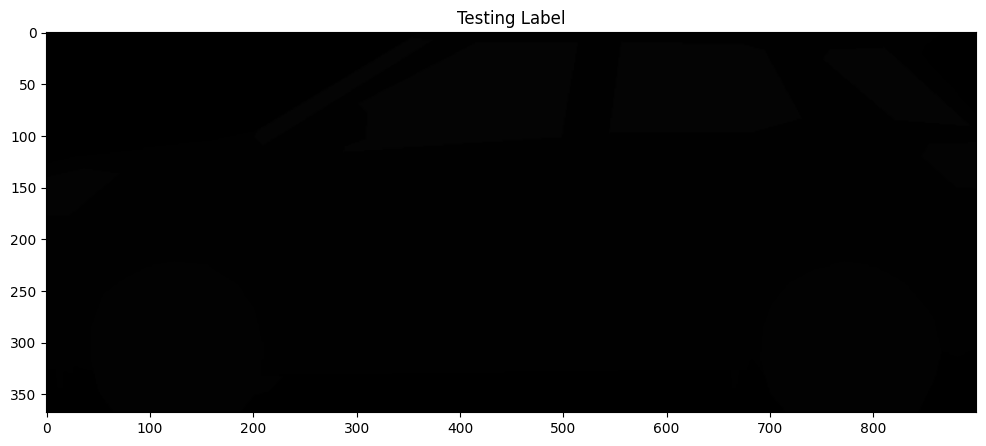

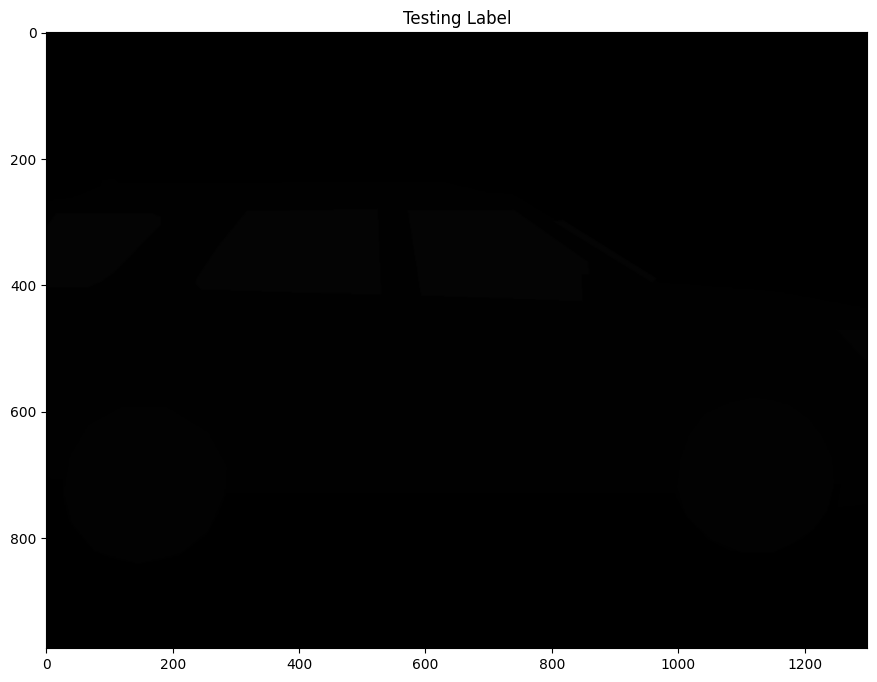

In [61]:
#Get Directory of car-segmentation images
parent = os.path.abspath(os.path.join(os.getcwd(), os.pardir)) #parent directory
img_folder = os.path.join(parent, "original-dataset", "images")
masks_folder = os.path.join(parent, "original-dataset", "masks")
destination_img_folder = os.path.join(parent, "car-segmentation", "images") #cartella di destinazione su cui salvare le immagini
destination_mask_folder = os.path.join(parent, "car-segmentation", "masks") #cartella di destinazione su cui salvare le maschere 
all_images = os.listdir(img_folder)
all_masks = os.listdir(masks_folder)

for i in range(2): #len(all_images)
    print("Eseguo sull'immagine: ", i+1)
    #immagine
    file = all_images[i] #Nome dell'immagine (e della maschera)
    image_path = os.path.join(img_folder, file)
    img = Image.open(image_path)
    #maschera
    mask_path = os.path.join(masks_folder,file)
    mask = Image.open(mask_path)
    
    #Operazioni
    #1) Mirror orizzonale di ogni immagine
    mirror_hor(img,file,mask,destination_img_folder,destination_mask_folder)
    
    #2) Rumore gaussiano
    gaussian_noise(image_path,file,mask,destination_img_folder,destination_mask_folder)
    
    #3) Colore
    color(img,file,mask,destination_img_folder,destination_mask_folder)
    
    #4) Blur
    blur(img,file,mask,destination_img_folder,destination_mask_folder)
    
    #5) Rotate 
    rotate(img,file,mask,destination_img_folder,destination_mask_folder)
    
    #6) scale
    zoom_center(img, zoom_factor=1.3,name_img=file)
    zoom_left(img, zoom_factor=1.3,name_img=file)
    
    
  